In [1]:
import numpy as np

# https://www.atomic-scale-physics.de/lattice/struk.xmol/a12.pos
atoms = """Mn1     0.00000000     0.00000000     0.00000000
Mn2     2.83311174     2.83311174     2.83311174
Mn3     3.18240437     3.18240437     0.30811550
Mn3     0.30811550     3.18240437     3.18240437
Mn3     3.18240437     0.30811550     3.18240437
Mn4     0.79840862     0.79840862     2.51287483
Mn4     2.51287483     0.79840862     0.79840862
Mn4     0.79840862     2.51287483     0.79840862
Mn1     8.91280000     0.00000000     0.00000000
Mn1     0.00000000     8.91280000     0.00000000
Mn1     0.00000000     0.00000000     8.91280000
Mn1     4.45640000     4.45640000     4.45640000
Mn2     7.28951174     7.28951174     7.28951174
Mn2     7.28951174     1.62328826     1.62328826
Mn2     1.62328826     7.28951174     1.62328826
Mn2     1.62328826     1.62328826     7.28951174
Mn3     7.63880437     7.63880437     4.76451550
Mn3     1.27399563     1.27399563     4.76451550
Mn3     1.27399563     7.63880437     4.14828450
Mn3     7.63880437     1.27399563     4.14828450
Mn3     4.76451550     7.63880437     7.63880437
Mn3     4.76451550     1.27399563     1.27399563
Mn3     4.14828450     1.27399563     7.63880437
Mn3     4.14828450     7.63880437     1.27399563
Mn3     7.63880437     4.76451550     7.63880437
Mn3     1.27399563     4.76451550     1.27399563
Mn3     7.63880437     4.14828450     1.27399563
Mn3     1.27399563     4.14828450     7.63880437
Mn4     5.25480862     5.25480862     6.96927483
Mn4     3.65799138     3.65799138     6.96927483
Mn4     3.65799138     5.25480862     1.94352517
Mn4     5.25480862     3.65799138     1.94352517
Mn4     6.96927483     5.25480862     5.25480862
Mn4     6.96927483     3.65799138     3.65799138
Mn4     1.94352517     3.65799138     5.25480862
Mn4     1.94352517     5.25480862     3.65799138
Mn4     5.25480862     6.96927483     5.25480862
Mn4     3.65799138     6.96927483     3.65799138
Mn4     5.25480862     1.94352517     3.65799138
Mn4     3.65799138     1.94352517     5.25480862
Mn1     8.91280000     8.91280000     0.00000000
Mn2     6.07968826     6.07968826     2.83311174
Mn3     5.73039563     5.73039563     0.30811550
Mn3     8.60468450     5.73039563     3.18240437
Mn3     5.73039563     8.60468450     3.18240437
Mn4     8.11439138     8.11439138     2.51287483
Mn4     6.39992517     8.11439138     0.79840862
Mn4     8.11439138     6.39992517     0.79840862
Mn1     8.91280000     0.00000000     8.91280000
Mn2     6.07968826     2.83311174     6.07968826
Mn3     5.73039563     3.18240437     8.60468450
Mn3     8.60468450     3.18240437     5.73039563
Mn3     5.73039563     0.30811550     5.73039563
Mn4     8.11439138     0.79840862     6.39992517
Mn4     6.39992517     0.79840862     8.11439138
Mn4     8.11439138     2.51287483     8.11439138
Mn1     0.00000000     8.91280000     8.91280000
Mn2     2.83311174     6.07968826     6.07968826
Mn3     3.18240437     5.73039563     8.60468450
Mn3     0.30811550     5.73039563     5.73039563
Mn3     3.18240437     8.60468450     5.73039563
Mn4     0.79840862     8.11439138     6.39992517
Mn4     2.51287483     8.11439138     8.11439138
Mn4     0.79840862     6.39992517     8.11439138
Mn1     8.91280000     8.91280000     8.91280000
""".splitlines()

atoms = np.array([line.split()[1:4] for line in atoms])
carbons = np.array(atoms).astype(float)



cell = """a(1) =  -4.45640000  4.45640000  4.45640000
a(2) =   4.45640000 -4.45640000  4.45640000
a(3) =   4.45640000  4.45640000 -4.45640000
""".splitlines()

cell = np.array([line.split()[2:5] for line in cell])
cell = np.array(cell).astype(float)
cell
celli = np.linalg.inv(cell)

# into the fractional coordinate
carbons = carbons @ celli
carbons.shape

(65, 3)

In [2]:
import plotly.graph_objects as go
import numpy as np

absolutepos = carbons @ cell

fig = go.Figure()

fig.add_trace(
    go.Scatter3d(
        x=absolutepos[:, 0],
        y=absolutepos[:, 1],
        z=absolutepos[:, 2],
        # x=vecs[zpos<0.5, 0],
        # y=vecs[zpos<0.5, 1],
        # z=vecs[zpos<0.5, 2],
        mode="markers",
        # marker=dict(size=2, color=zpos[:]),
    )
)

fig.update_layout(
    title="local arrangement",
    autosize=True,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
)

fig.show()

上のデータはじつはMnの座標なので、結合長を正しく設定しなければならない。

とりあえず、近接原子間距離の最小値をさがす。

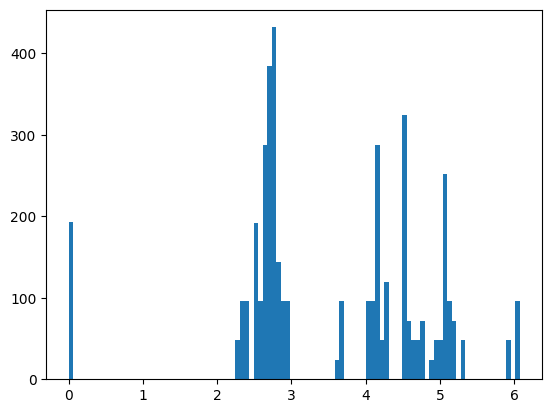

In [3]:
import matplotlib.pyplot as plt
distances = []
for i, ci in enumerate(carbons):
    vectors = []
    for cj in carbons:
        d = ci - cj
        # PBC
        d -= np.floor(d + 0.5)
        # fractional to absolute
        d = d @ cell
        distances.append(np.linalg.norm(d))

H = plt.hist(distances, bins=100)

In [6]:
import boo

neighbors = dict()

numAtoms = carbons.shape[0]

boos = np.zeros([carbons.shape[0], 5])
rc = 3.1

for i, ci in enumerate(carbons):
    vectors = []
    for cj in carbons:
        d = ci - cj
        # PBC
        d -= np.floor(d + 0.5)
        # fractional to absolute
        d = d @ cell
        if 0 < d @ d < rc**2:
            vectors.append(d)

    vectors = np.array(vectors)
    for k, l in enumerate([4, 6, 8, 10, 12]):
        X = vectors[:, 0]
        Y = vectors[:, 1]
        Z = vectors[:, 2]
        booo = boo.boo(l, X, Y, Z)
        print(f"boo Q_{l} {booo}")
        boos[i, k] = booo

# 扱いやすいように、見出しをつけてpandasデータフレームにする。
import pandas as pd

df_aMn = pd.DataFrame(boos, columns=["q_4", "q_6", "q_8", "q_10", "q_12"])
df_aMn

boo Q_4 (0.02501779137582042+0j)
boo Q_6 (0.1932838507595251+0j)
boo Q_8 (0.24130808751828478+0j)
boo Q_10 (0.06374237743256356+0j)
boo Q_12 (0.39002034854923173+0j)
boo Q_4 (0.1809421603999343+0j)
boo Q_6 (0.3473310802215982+0j)
boo Q_8 (0.22151778681423814+0j)
boo Q_10 (0.2221803802854087+0j)
boo Q_12 (0.4277454966454455+0j)
boo Q_4 (0.08235596589447111+0j)
boo Q_6 (0.42530855209714863+0j)
boo Q_8 (0.11579348291170494+0j)
boo Q_10 (0.23867976173191038+0j)
boo Q_12 (0.3173164885102576+0j)
boo Q_4 (0.08245188817391053+0j)
boo Q_6 (0.4511540034415966+0j)
boo Q_8 (0.11095052821501493+0j)
boo Q_10 (0.22455306169452263+0j)
boo Q_12 (0.3306711498865682+0j)
boo Q_4 (0.07966781453207719+0j)
boo Q_6 (0.44352094496970457+0j)
boo Q_8 (0.1312389459060743+0j)
boo Q_10 (0.21495547820192407+0j)
boo Q_12 (0.32067818372998536+0j)
boo Q_4 (0.229219515432246+0j)
boo Q_6 (0.6205070379966503+0j)
boo Q_8 (0.22484777202249098+0j)
boo Q_10 (0.380698936217078+0j)
boo Q_12 (0.4934116771657006+0j)
boo Q_4 (0.22

/var/folders/g2/t_qwkbf48xj4860059bm17mh0000gs/T/ipykernel_22439/57997122.py:28: ComplexWarning:

Casting complex values to real discards the imaginary part



,q_4,q_6,q_8,q_10,q_12
0,0.025018,0.193284,0.241308,0.063742,0.390020
1,0.180942,0.347331,0.221518,0.222180,0.427745
2,0.082356,0.425309,0.115793,0.238680,0.317316
3,0.082452,0.451154,0.110951,0.224553,0.330671
4,0.079668,0.443521,0.131239,0.214955,0.320678
...,...,...,...,...,...
60,0.062177,0.451606,0.127226,0.222386,0.315190
61,0.233706,0.624474,0.220071,0.375835,0.489518
62,0.232588,0.646711,0.230716,0.378535,0.513924
63,0.233706,0.624474,0.220071,0.375835,0.489518


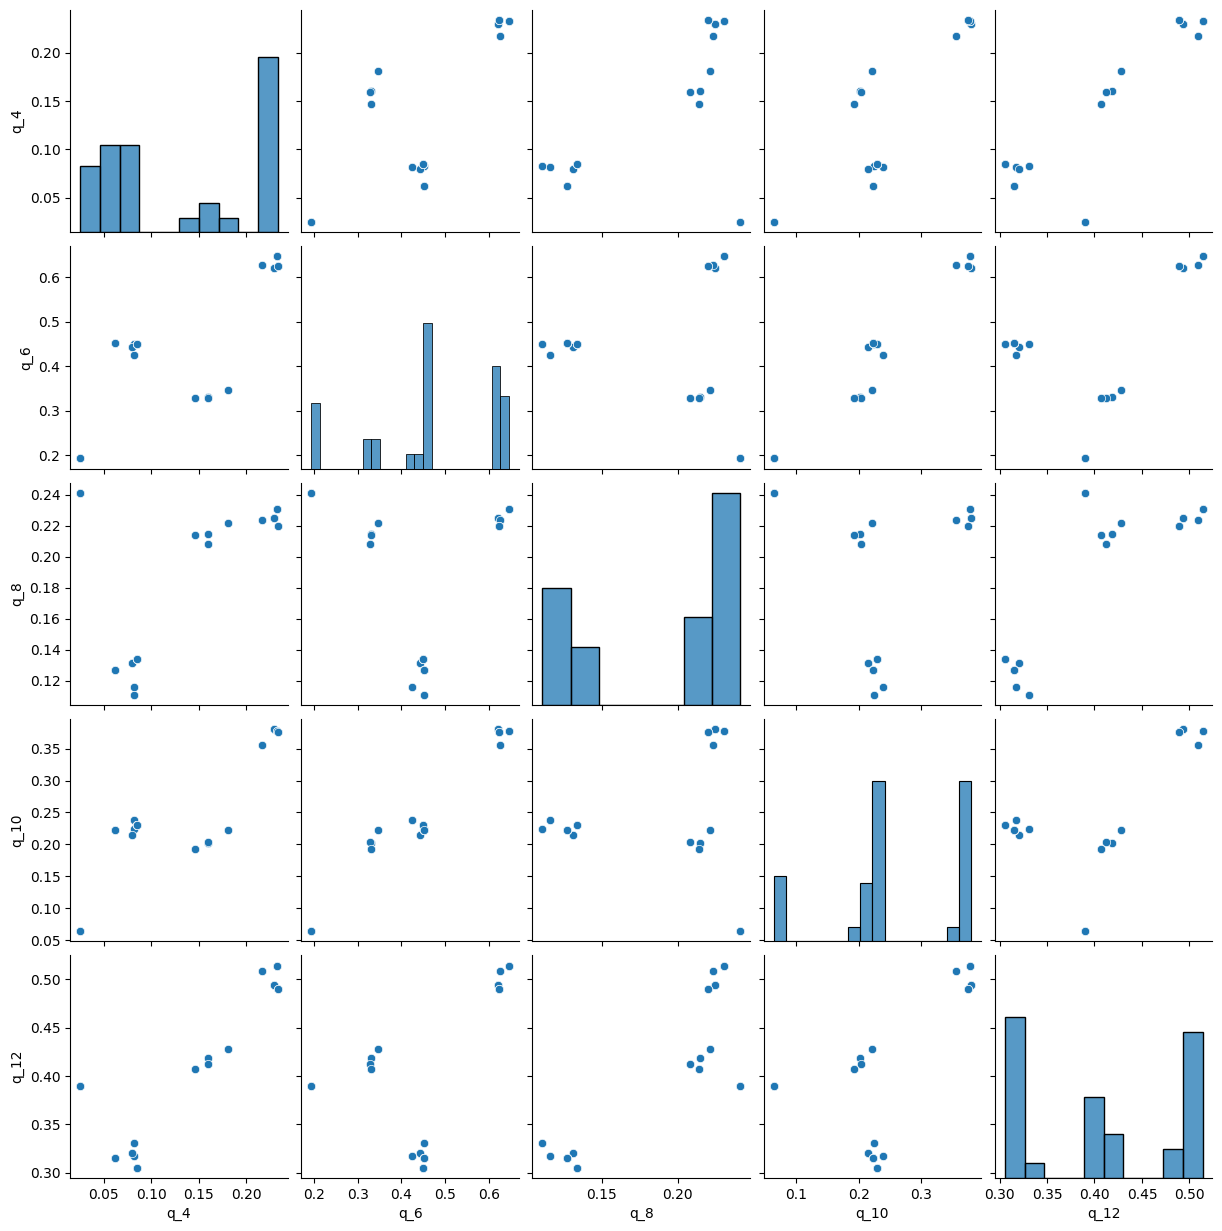

In [8]:
import seaborn as sns

sns.pairplot(df_aMn, diag_kws=dict(bins=100, binwidth=0.02))